# Handwritten Digit Classification

This notebook shows how to classify number digits from MNIST following the article: [https://towardsdatascience.com/how-to-classify-handwritten-digits-in-python-7706b1ab93a3/](https://towardsdatascience.com/how-to-classify-handwritten-digits-in-python-7706b1ab93a3/).


In [22]:
from collections import deque
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd

from DNN import DNN

np.random.seed(13)

## Data and Exploration


In [2]:
data = pd.read_csv(Path("data") / "mnist" / "mnist_train.csv")
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_data = pd.read_csv(Path("data") / "mnist" / "mnist_test.csv")
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Separate the labels
labels = np.array(data.iloc[:, 0])
print(f"Labels shape: {labels.shape}")

# Remaining data (image values) and normalized
x_train = np.array(data.iloc[:, 1:]) / 255
print(f"x_train shape: {x_train.shape}")

Labels shape: (60000,)
x_train shape: (60000, 784)


In [5]:
test_labels = np.array(test_data.iloc[:, 0])
print(f"Test labels shape: {test_labels.shape}")

x_test = np.array(test_data.iloc[:, 1:]) / 255
print(f"Test labels shape: {x_test.shape}")

Test labels shape: (10000,)
Test labels shape: (10000, 784)


In [6]:
# One-hot encoding
encoded_labels = []

for i in range(len(labels)):
    naked = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    naked[labels[i]] = 1
    encoded_labels.append(naked)

print(f"Encoded labels shape: {np.array(encoded_labels).shape}")

Encoded labels shape: (60000, 10)


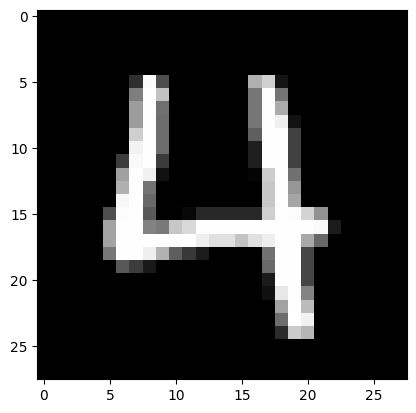

In [7]:
# Take a look at what the images look like
random_index = np.random.randint(0, 40_000)  # pick randomly
img = x_train[random_index].reshape(28, 28)
plt.imshow(img, cmap="gray")

## Original Neural Net Training


In [8]:
# DNN model with 3 layers: 784 input, 1250 hidden, 10 output
model_1 = DNN([784, 1250, 10])

In [9]:
# Double ended queue (doubly linked list; supports fast appends and pops from both ends of the collection)
# A deque is just a list that stays at specified units long (last item gets deleted when a new item gets added when at max length)
error = deque(maxlen=30000)

In [10]:
for n in range(30_000):
    index = np.random.randint(0, 59998)
    error.append(model_1.train(x_train[index], encoded_labels[index]))

    if n % 10_000 == 0:  # Print every few steps
        print("-" * 13)
        print(f"nStep: {n:,}")
        print(f"Average Error: {sum(error) / 1000:.3f}")

        print(f"True Label: {np.argmax(encoded_labels[index])}")
        print(f"Prediction: {np.argmax(model_1.predict(x_train[index]))}")

        # plt.imshow(x_train[index].reshape(28, 28), cmap="gray")
        # plt.show()

-------------
nStep: 0
Average Error: 0.009
True Label: 5
Prediction: 2
-------------
nStep: 10,000
Average Error: 8.946
True Label: 2
Prediction: 6
-------------
nStep: 20,000
Average Error: 13.812
True Label: 4
Prediction: 4


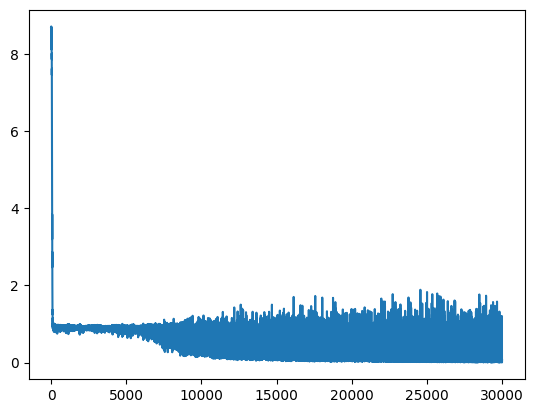

In [11]:
# Plot error for training
plt.plot(error)

## Original Neural Net Test


In [12]:
correct = 0

for i in range(len(test_data)):
    prediction = np.argmax(model_1.predict(x_test[i]))
    if prediction == test_labels[i]:
        correct += 1

percent_correct = correct / len(test_data) * 100
print(f"Percent correct: {percent_correct:.2f}%")

Percent correct: 87.60%


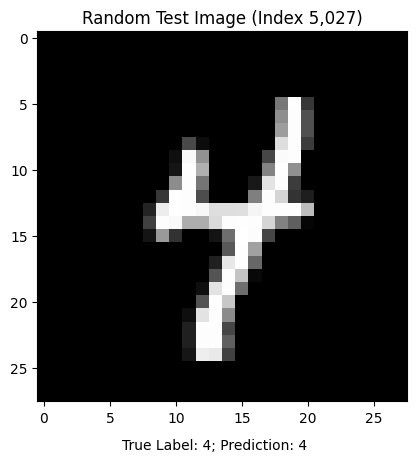

In [13]:
# Random sample image, with title and captions
index = np.random.randint(0, len(test_data))
img = x_test[index].reshape(28, 28)
plt.imshow(img, cmap="gray")

plt.title(f"Random Test Image (Index {index:,})")
caption_text = f"True Label: {test_labels[index]}; Prediction: {np.argmax(model_1.predict(x_test[index]))}"
plt.figtext(
    0.5, 0.01, caption_text, wrap=True, horizontalalignment="center", fontsize=10
)

plt.savefig(Path("outputs") / "random_test_image.png", dpi=300)
plt.show()

## Enhanced Neural Net

_With the same neural network architecture with the same number of hidden layers, if you increase the number of neurons in the hidden layers, does the network performance improve, stay the same, or degrade?_


In [ ]:
# Experiment: Varying Hidden Layer Neurons

# 1. Define a list of hidden layer neuron counts to test
# Including the original 1250 for comparison
hidden_neuron_counts = [
    100,
    250,
    500,
    750,
    1000,
    1250,
    1500,
    2000,
    5000,
    7500,
    10_000,
    12_500,
]

In [19]:
# 2. Store results
results = {"hidden_neurons": [], "final_avg_train_error": [], "test_accuracy": []}

In [20]:
# 3. Loop through each neuron count
print("\nStarting Experiment: Varying Hidden Layer Neurons")
for num_neurons in hidden_neuron_counts:
    print(f"\nTraining model with {num_neurons} hidden neurons")

    # a. Initialize model
    # Input layer: 784 (28*28 pixels)
    # Hidden layer: num_neurons
    # Output layer: 10 (digits 0-9)
    model = DNN([784, num_neurons, 10])

    # b. Train model for the smaller number of steps as the original example, for faster training
    error_deque = deque(maxlen=10_000)  # Reset deque for each model
    num_training_steps = 30_000

    for n in range(num_training_steps):
        index = np.random.randint(0, 59998)  # Randomly pick a training example
        error_deque.append(model.train(x_train[index], encoded_labels[index]))

        if n % 10_000 == 0:
            # Calculate true average error for reporting
            current_avg_error = sum(error_deque) / len(error_deque)
            print(
                f"  Step: {n:,}, Current Average Training Error: {current_avg_error:.3f}"
            )

    final_avg_train_error = sum(error_deque) / len(error_deque)
    print(f"  Final Average Training Error: {final_avg_train_error:.3f}")

    # c. Evaluate on test set
    correct = 0
    for i in range(len(test_data)):
        prediction = np.argmax(model.predict(x_test[i]))
        if prediction == test_labels[i]:
            correct += 1
    percent_correct = correct / len(test_data) * 100
    print(f"  Test Accuracy: {percent_correct:.2f}%")

    # d. Store results
    results["hidden_neurons"].append(num_neurons)
    results["final_avg_train_error"].append(final_avg_train_error)
    results["test_accuracy"].append(percent_correct)

print("\nExperiment Finished")


Starting Experiment: Varying Hidden Layer Neurons

Training model with 100 hidden neurons
  Step: 0, Current Average Training Error: 3.173
  Step: 10,000, Current Average Training Error: 0.924
  Step: 20,000, Current Average Training Error: 0.898
  Final Average Training Error: 0.845
  Test Accuracy: 46.53%

Training model with 250 hidden neurons
  Step: 0, Current Average Training Error: 4.231
  Step: 10,000, Current Average Training Error: 0.913
  Step: 20,000, Current Average Training Error: 0.731
  Final Average Training Error: 0.472
  Test Accuracy: 81.02%

Training model with 500 hidden neurons
  Step: 0, Current Average Training Error: 6.202
  Step: 10,000, Current Average Training Error: 0.900
  Step: 20,000, Current Average Training Error: 0.615
  Final Average Training Error: 0.374
  Test Accuracy: 86.87%

Training model with 750 hidden neurons
  Step: 0, Current Average Training Error: 7.477
  Step: 10,000, Current Average Training Error: 0.883
  Step: 20,000, Current Avera

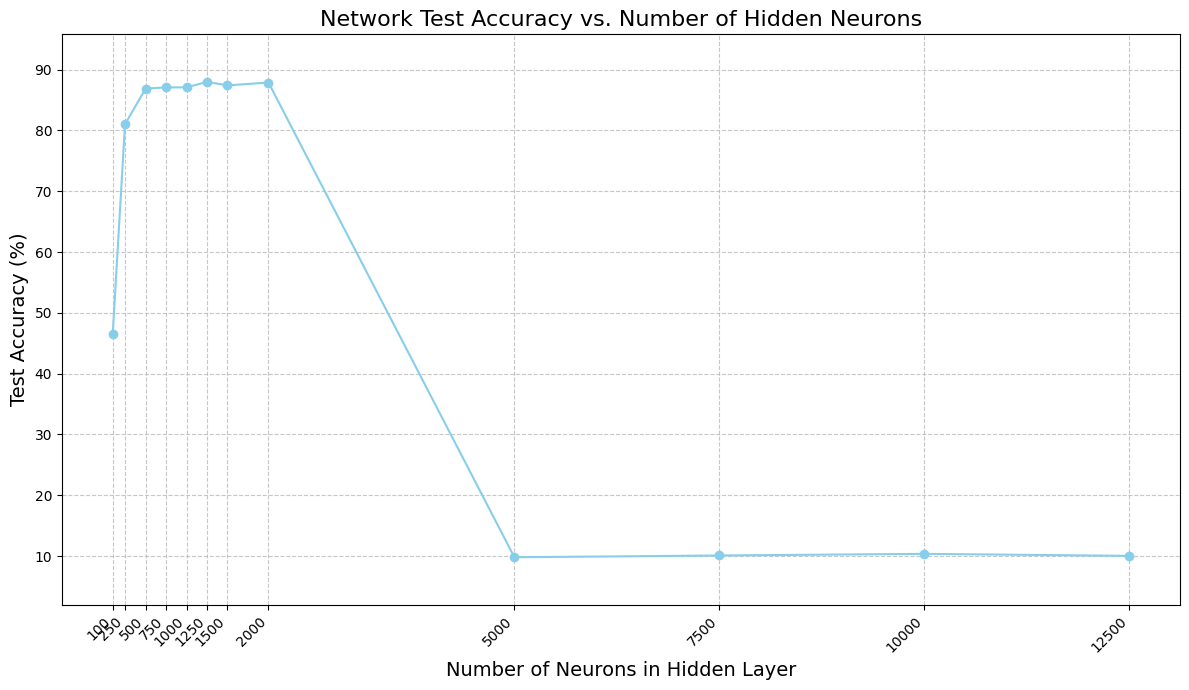

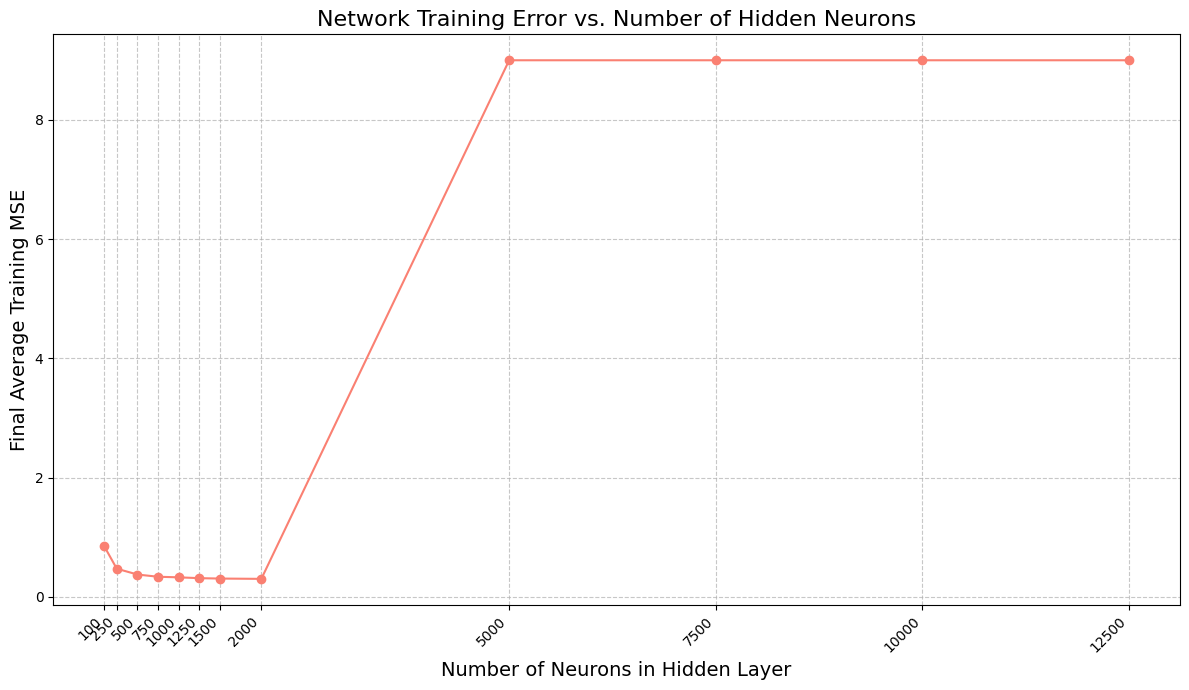

In [23]:
# 4. Generate figures
# Convert results to a DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Plot 1: Test Accuracy vs. Hidden Neurons
plt.figure(figsize=(12, 7))
plt.plot(
    results_df["hidden_neurons"],
    results_df["test_accuracy"],
    marker="o",
    linestyle="-",
    color="skyblue",
)
plt.title("Network Test Accuracy vs. Number of Hidden Neurons", fontsize=16)
plt.xlabel("Number of Neurons in Hidden Layer", fontsize=14)
plt.ylabel("Test Accuracy (%)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(results_df["hidden_neurons"], rotation=45, ha="right")

# Get the current axes
ax = plt.gca()

# Use MaxNLocator to automatically determine a good number of ticks (e.g., max 10 ticks)
ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=10))

# Set y-axis limits with some padding to prevent data points from touching the edges
min_acc = results_df["test_accuracy"].min()
max_acc = results_df["test_accuracy"].max()
# Calculate padding as 10% of the data range, or a default of 1.0 if range is zero
padding = (max_acc - min_acc) * 0.1
if padding == 0:
    padding = 1.0  # Default padding if all accuracies are the same
ax.set_ylim(min_acc - padding, max_acc + padding)

# Ensure limits don't go below 0% or above 100% for accuracy
if ax.get_ylim()[0] < 0:
    ax.set_ylim(0, ax.get_ylim()[1])
if ax.get_ylim()[1] > 100:
    ax.set_ylim(ax.get_ylim()[0], 100)

plt.tight_layout()
plt.savefig(Path("outputs") / "accuracy_vs_hidden_neurons.png", dpi=300)
plt.show()

# Plot 2: Training Error vs. Hidden Neurons
plt.figure(figsize=(12, 7))
plt.plot(
    results_df["hidden_neurons"],
    results_df["final_avg_train_error"],
    marker="o",
    linestyle="-",
    color="salmon",
)
plt.title("Network Training Error vs. Number of Hidden Neurons", fontsize=16)
plt.xlabel("Number of Neurons in Hidden Layer", fontsize=14)
plt.ylabel("Final Average Training MSE", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(results_df["hidden_neurons"], rotation=45, ha="right")
plt.tight_layout()
plt.savefig(Path("outputs") / "training_error_vs_hidden_neurons.png", dpi=300)
plt.show()